# TUGAS KECIL 2 IF-3170 Inteligensi Buatan

    Renjira Naufhal Dhiaegana  13516014
    Intan Nurjannah            13516xxx

## 1.Membaca dataset iris dan play-tennis

###    1.1 Membaca dataset iris

In [1]:
from sklearn import datasets

iris_data = datasets.load_iris()

    
print(iris_data.DESCR+"\n")
print(iris_data.feature_names)
print(iris_data.data)
print(iris_data.target_names)
print(iris_data.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 1.2 Membaca dataset play-tennis(.csv)

In [2]:
import pandas

tennis_data = pandas.read_csv('weather.nominal.csv')

tennis_data

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## 2. Melakukan Pembelajaran (pada dataset iris)

### 2.1 Naive Bayes

In [3]:
from sklearn.naive_bayes import GaussianNB as NB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier as MLP
import matplotlib.pyplot as plt

X = iris_data.data
Y = iris_data.target
gnb = NB()
gnb.fit(X,Y)
iris_pred = gnb.predict(X)
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("NB accuracy:",accuracy_score(y_pred=iris_pred,y_true=Y))

print("\nNB precision:",precision_score(y_pred=iris_pred,y_true=Y,average='micro'))

print("\nNB recall",recall_score(y_pred=iris_pred,y_true=Y,average='micro'))


NB accuracy: 0.96

NB precision: 0.96

NB recall 0.96


### 2.2 Decision Tree

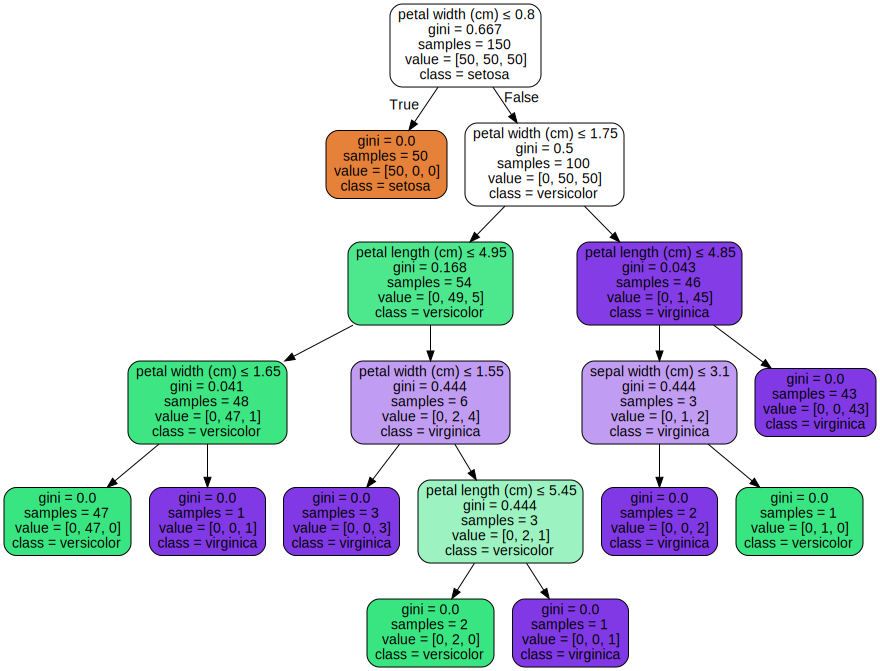

In [5]:
import graphviz
dtree = tree.DecisionTreeClassifier()
dtree.fit(iris_data.data, iris_data.target)

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=iris_data.feature_names,  
                         class_names=iris_data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


### 2.3 K-Nearest Neighbor

In [6]:
knn = KNN()
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

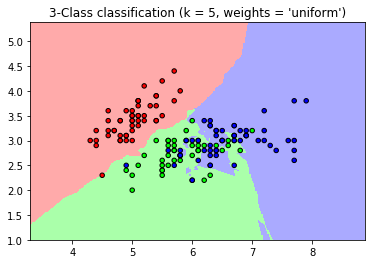

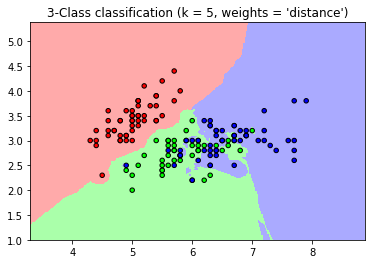

In [7]:
from matplotlib.colors import ListedColormap
import numpy as np
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02
n_neighbors = 5
X = iris_data.data[:, :2]

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNN(n_neighbors, weights=weights)
    clf.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### 2.4 Multilayer Perceptron

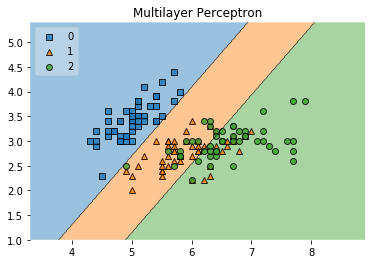

In [8]:
mlp = MLP(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)
mlp.fit(X,Y)

from mlxtend.plotting import plot_decision_regions

fig = plot_decision_regions(X=X, y=Y, clf=mlp, legend=2)
plt.title('Multilayer Perceptron')
plt.show()

## 3 Melakukan pembelajaran dengan split train 90:10